In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def KernelFunction(theta, X1, X2):
    ret = theta[0] * np.exp(-theta[1]/2 * np.dot((X1 - X2), (X1 - X2))) + theta[2] + theta[3]*np.dot(np.transpose(X1), X2)
    return ret

In [4]:
snr = 0.2
numMaxPoints = 50

X = np.arange(0, 2*np.pi, 0.1)
numTruePoints = X.shape[0]
trueY = np.sin(X)

theta = np.array([1, 1, 1, 1])
beta = 200

showVisualization = [1, 5, 10, 20, 30, 49]

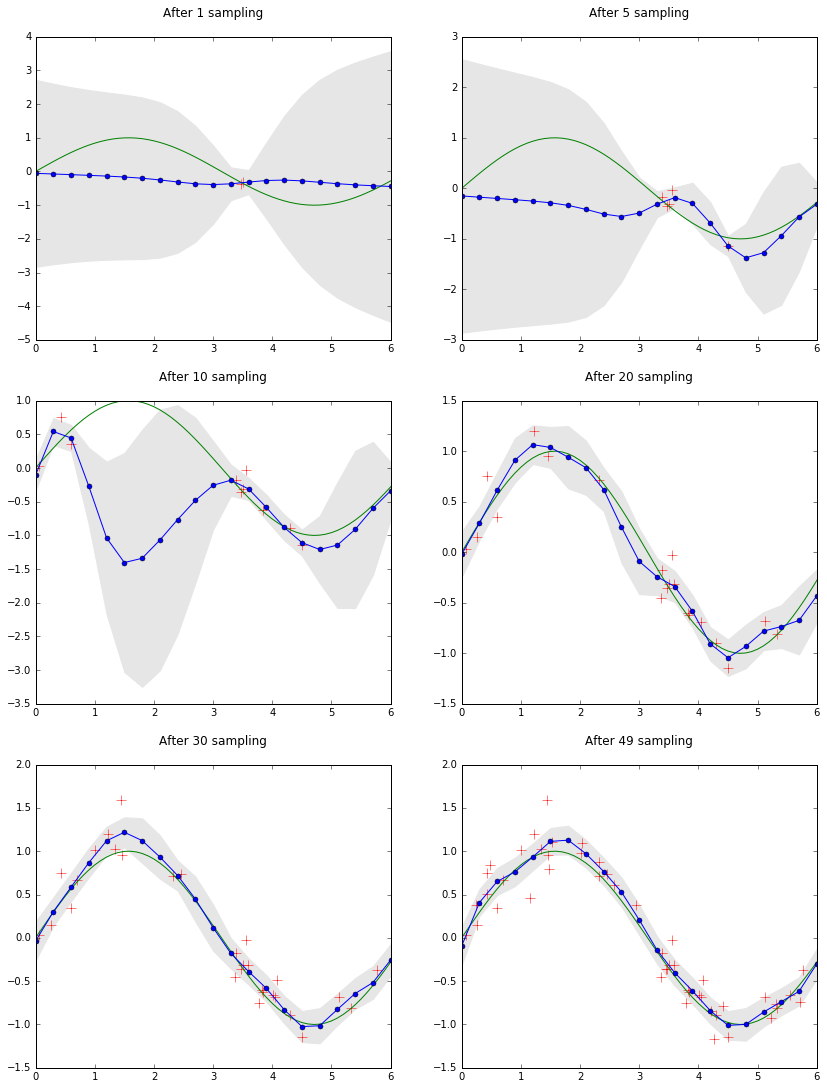

In [5]:
sampleX = []
sampleY = []

plt.figure(1, figsize=(14, 25), dpi=100)
plotN = 1

for itr2 in range(numMaxPoints):
    
    sampleX.append(2*np.pi*np.random.random())
    sampleY.append(np.sin(sampleX[-1]) + snr * np.random.randn())
    numPoints = len(sampleX)
    
    inputs = np.arange(0, 2*np.pi, 0.3)
    
    mu_next = []
    sigma2_next = []

    for itr1 in range(len(inputs)):
        inputElement = inputs[itr1]
        
        C = np.zeros((numPoints, numPoints))
        
        for i in range(numPoints):
            for j in range(numPoints):
                C[i, j] = KernelFunction(theta, sampleX[i], sampleX[j])
                if i == j:
                    C[i, j] += 1.0 / beta
                    
        k = np.zeros(numPoints)
        for i in range(numPoints):
            k[i] = KernelFunction(theta, sampleX[i], inputElement)
            
        c = KernelFunction(theta, inputElement, inputElement) + 1.0 / beta
        
        C_inv = np.linalg.inv(C)
        mu_next.append(np.dot(k, np.dot(C_inv, sampleY)))
        sigma2_next.append(c - np.dot(k, np.dot(C_inv, k)))
    
    if itr2 in showVisualization:
        plt.subplot(4, 2, plotN)
        plt.xlim([0, 6])
        plt.title('After %s sampling\n'%(itr2))
        plotN  += 1
        plt.fill_between(inputs, mu_next - 2*np.sqrt(sigma2_next), mu_next + 2*np.sqrt(sigma2_next), color = (0.9, 0.9, 0.9))
        plt.plot(sampleX, sampleY, 'r+', markersize = 10)
        plt.plot(X, trueY, 'g-')
        plt.plot(inputs, mu_next, 'bo-', markersize = 5)
        